# CS413 Image and Video Analysis -- Lab 1

## Department of Computer Science, University of Warwick
## July, 2019

## Aims:

The aims of this lab are to

+ learn about loading, displaying and saving images in Python using: `PIL` (Pillow), `numpy`  and `matplotlib` libraries
+ understand how images can be represented as arrays and performing simple manipulations on them
+ learn about what is meant by sampling and quantisation of images
+ know how to apply blurring operations to overcome aliasing artefacts
+ know about image colour channels and manipulating colour spaces
+ build a crude colour image compression by color channel subsampling

### Basic Image loading,  manipulation and visualisation

In [2]:
# import statements

from PIL import Image  # this contain the image class and methods from PIL library
import numpy as np # this imports the numerical and array library 

import matplotlib.pyplot as plt # this is for plotting (showing) images 



In [3]:
# load an image

# location of image data -- change this to wherever the lab data is kept
data_dir = '/modules/cs413/data/'

image = Image.open(data_dir + 'bees.jpeg')

# print some information about the image

print('image format is ', image.format)
print('image mode is ', image.mode)
print('image size is ', image.size)

# the image size is the width x height

image format is  JPEG
image mode is  RGB
image size is  (3024, 4032)


In [4]:
# make the image into a numpy array so we can access and manipulate the pixel values

im = np.asarray(image)

print('image array type ', im.dtype)
print('image array shape ', im.shape)

# notice how the size is now expressed as number of rows x num columns x num of channels


image array type  uint8
image array shape  (4032, 3024, 3)


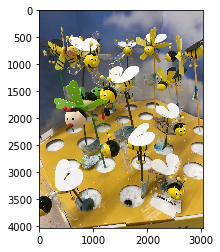

In [14]:
# now we can use pyplot.imshow to display the image

plt.imshow(im)
plt.show()

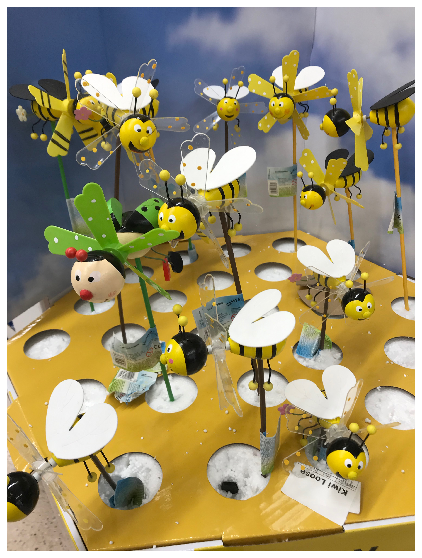

In [15]:
# if we want to make it bigger, remove the figure axis, we can do the following

fig = plt.figure(figsize=(10,10))

plt.imshow(im)
plt.axis('off')

plt.show()


### Other ways to load images into `numpy` arrays...

You can also use the `matplotlib.pyplot.imread` function

~~~
    im = plt.imread(data_dir + 'bees.jpeg')
~~~

This time, `im` is already a `numpy` array:
    
~~~~
    print(im.shape)
    (4032, 3024, 3)
~~~~
Note that that the image values are normalised on read (to range [0,1]).

Note the order of the shape sizes is given as: 
~~~~
    height (number of rows), width (number of columns), number of colour channels
~~~~

In [16]:
im = plt.imread(data_dir + 'bees.jpeg')
print(im.shape)

(4032, 3024, 3)


## Image representation, numpy arrays and colour:

The image is stored as 3 arrays: `im[:,:,0]`, `im[:,:,1]`, `im[:,:,2]`, where the third index 
    `(0, 1, 2)` is the colour channel (here `0=Red`, `1=Green`, `2=Blue`)
    
## Exercise 1

1. Display the green channel of the 'bees' image
2. Create and show a scalar image where the intensity represents the yellow in the image
3. Create and show a binary image (which has only values 0 and 1), where the pixel value is 1 if the bees image 
    has more that 50% green (green values > 127)
    
    

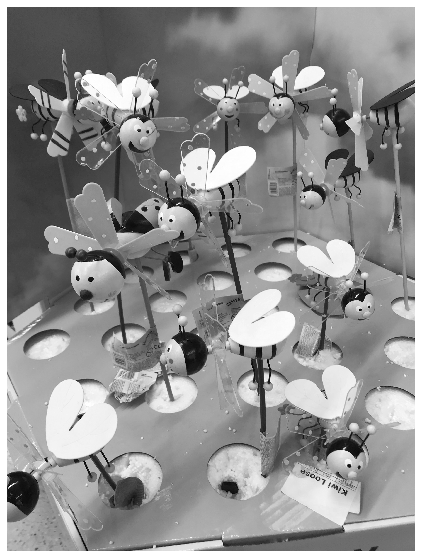

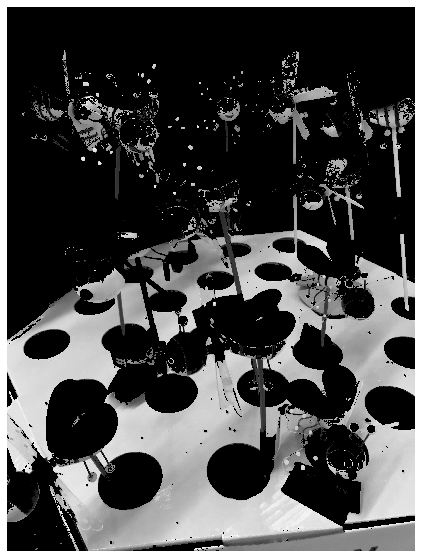

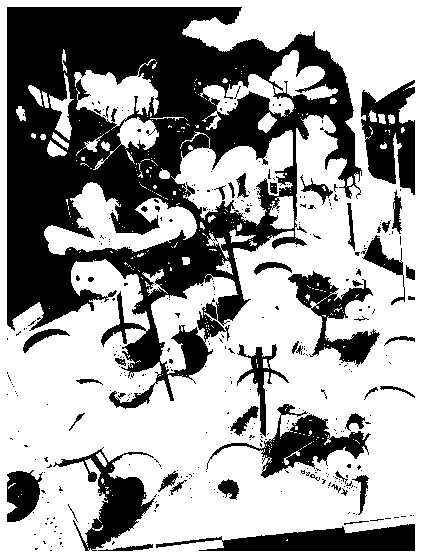

In [17]:
import matplotlib as mpl
fig = plt.figure(figsize=(10,10))
plt.imshow(im[:,:,1], cmap='gray')
plt.axis('off')
plt.show()

hsvim = mpl.colors.rgb_to_hsv(im/255)*255
low_yellow = np.array([20,100,100])
high_yellow = np.array([30,255,255])

def is_yellow(col):
    h,s,v = col
    if h<=15 or h>=35:
        return 0
    elif s<85:
        return 0
    return v

yellow = np.apply_along_axis(is_yellow, 2, hsvim)

fig = plt.figure(figsize=(10,10))
plt.imshow(yellow, cmap='gray')
plt.axis('off')
plt.show()

imcp = im.copy()
high_green = imcp[:,:,1]
halfthresh = 128

for x in range(high_green.shape[0]):
    for y in range(high_green.shape[1]):
        if high_green[x,y]<halfthresh:
            high_green[x,y] = 0
        else:
            high_green[x,y] = 1

fig = plt.figure(figsize=(10,10))
plt.imshow(high_green, cmap='gray')
plt.axis('off')
plt.show()

### Selecting rectangular regions of an image

This can be done using array indexing....

block has shape  (256, 256, 3)


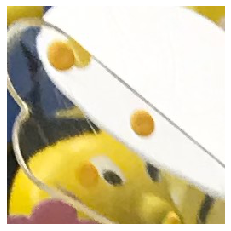

In [18]:
# We can select parts of the original image by using array range indexing

# remeber that numpy arrays can be indexed using the colon (slicing) operator to indicate a range of indexes
# e.g. a[0:10] selects the first 10 values of the array a
# for example

block = im[512:768,512:768] # select a region of size 256 x 256 at (512, 512)
print('block has shape ', block.shape)

plt.axis('off')
plt.imshow(block)
plt.show()


## Exercise 2

In this exercise, I want you to select 10 random blocks of size 128 x 128 from the image. 


### Random numbers
To do this, we need to be able to generate random integers and `numpy.random.randint()` can do this,

e.g. 
~~~~
    height = im.shape[0] 
    width = im.shape[1]
    x = np.random.randint(width) # one random number in range [0, width-1]
    y = np.random.randint(height) # one random number in range [0, height-1]
~~~~

### Display multiple images in one figure

To display your 10 images togehter in one figure, you can use pyplot.suplot().

e.g.
~~~~
    # show the kth plot
    plt.subplot(2,5, k) # plot k in an array of plots 2 rows x 5 columns
    plt.imshow(block)
    plt.axis('off')
~~~~

### Loop?

Note that to solve this exercise, you need to use a for loop, e.g. something like 
~~~~
    height = im.shape[0]
    width = im.shape[1]

    block_size = 128

    for i in range(10):

        # select random position of image block

        # extract image block
        
        # display image block in subplot
        
        
    plt.show()
~~~~
   

1171 2429 0
2380 499 1
186 2362 2
2650 2449 3
2182 704 4
3056 2069 5
1 1202 6
724 843 7
2676 550 8
1186 2283 9
[1171, 2380, 186, 2650, 2182, 3056, 1, 724, 2676, 1186] [2429, 499, 2362, 2449, 704, 2069, 1202, 843, 550, 2283]


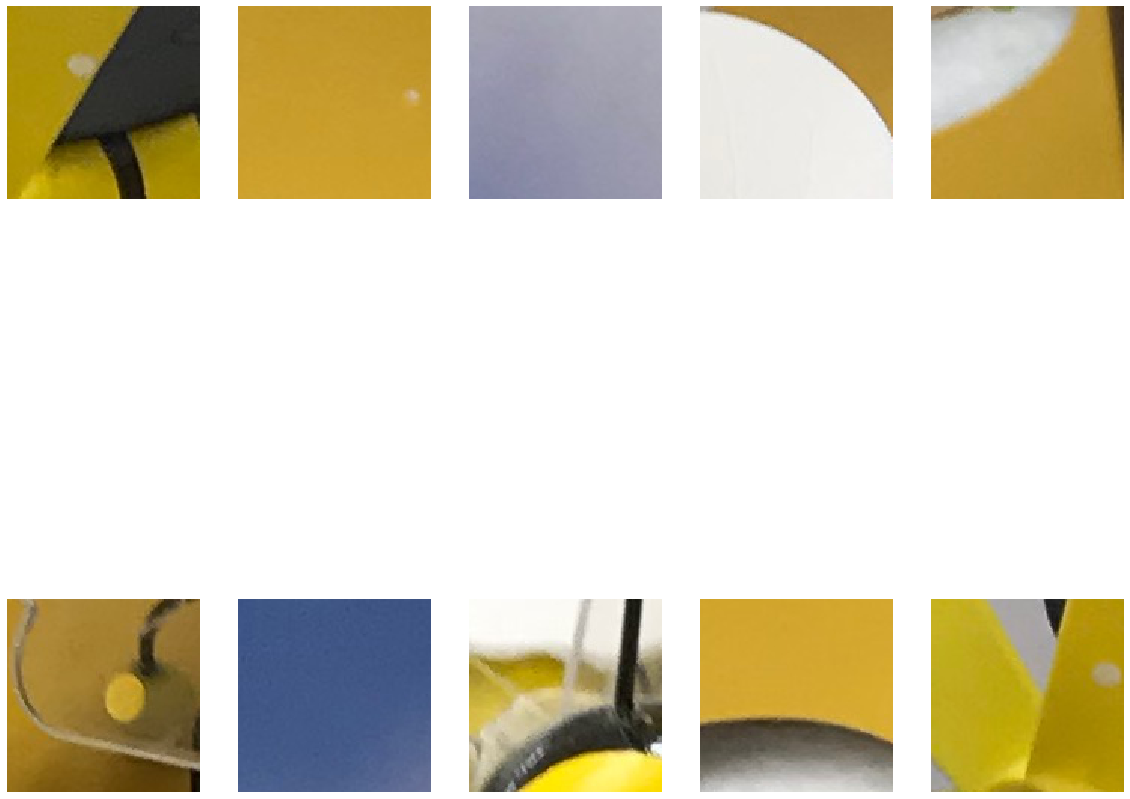

In [19]:
fig = plt.figure(figsize=(20,20))
height = im.shape[1] 
width = im.shape[0]
randx = []
randy = []
blocksize = 128
for z in range(10):
    x = np.random.randint(width-blocksize) # one random number in range [0, width-1]
    y = np.random.randint(height-blocksize) # one random number in range [0, height-1]
    print(x,y,z)
    randx.append(x)
    randy.append(y)
    block = im[x:x+blocksize,y:y+blocksize]
    plt.subplot(2,5,z+1)
    plt.imshow(block)
    plt.axis('off')
print(randx,randy)
plt.show()



## Subsampling and Aliasing artefacts

The numpy slicing operator can also select the step of the index range, 
e.g. `a[0:10:2]` will select the first, third, fifth, seventh and ninth element, i.e. it will select every other
element of the given range.

We can use this do image subsampling.
~~~~
    im_subx2 = im[::2,::2] # image subamplex by a factor of 2
~~~~

subsampled size is  (2016, 1512, 3)


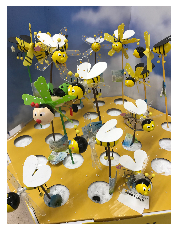

In [20]:
# subsample and display the bees image

im_subx2 = im[::2,::2]

print('subsampled size is ', im_subx2.shape)

plt.axis('off')
plt.imshow(im_subx2)

## Exercise 3 -- Downsampling and upsampling

It is not easy to see what the subsampling is doing to the bees image content (other than reducing the resolution).
Instead, we can use a FM test pattern image (`testimage512.gif`) to visualise the artefacts created in the
spatial frequencies.

1. Load the and display the image `testimage512.gif` which is in the data directory.

~~~~
    fm = np.asarray(Image.open(data_dir + 'testimage512.gif'))

    print(fm.shape, fm.dtype)
    fig = plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(fm, interpolation='sinc', cmap='gray') # use 'sinc' interpolation in imshow 
    plt.show()
~~~~

(Note we have to use a better display interpolation for the `imshow()` to avoid seeing display artefacts!)

2. Use `plt.subplot()` to display side-by-side the testimage at resolutions which are reduced by factors 2, 4, and 8.

3. Work out how to upsample the image by pixel duplication. Write a function to upsample an image, e.g.:

~~~~
    def upsample(im, size=2):
    
        # define an array of zeros of twice the size of the input im
        output = np.zeros(...)
        
        # do a nested for loop to broad cast values from input to output
        
        for i in ... : # step in size
            for j in ... : # step in size
                
                output[i:i+size,j:j+size] = im[i//size,j//size] # broad cast values
                
        return output
~~~~
                
3. Use your function to upsample the downsampled image and display the results.


(512, 512) uint8


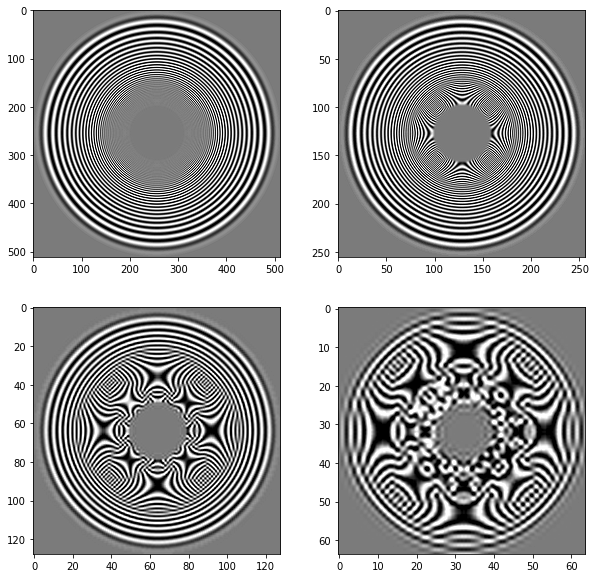

In [5]:
fm = np.asarray(Image.open(data_dir + 'testimage512.gif'))

print(fm.shape, fm.dtype)
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.subplot(2,2,1)
plt.imshow(fm, interpolation='sinc', cmap='gray') # use 'sinc' interpolation in imshow 
plt.subplot(2,2,2)

def subsamp(i,n):
    return i[::n,::n]

fm_subx2 = subsamp(fm,2)
fm_subx4 = subsamp(fm,4)
fm_subx8 = subsamp(fm,8)
plt.imshow(fm_subx2, interpolation='sinc', cmap='gray')
plt.subplot(2,2,3)
plt.imshow(fm_subx4, interpolation='sinc', cmap='gray')# use 'sinc' interpolation in imshow
plt.subplot(2,2,4)
plt.imshow(fm_subx8, interpolation='sinc', cmap='gray')

plt.show()

(256, 256)
512
512


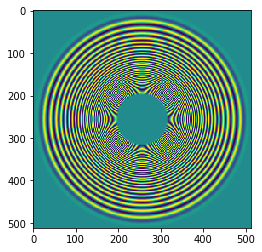

512
512


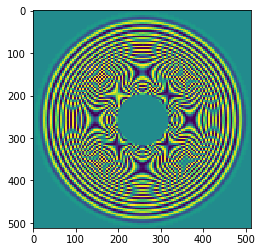

512
512


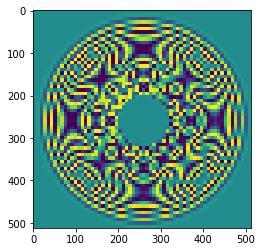

In [6]:
def upsample(im, size):

        # define an array of zeros of twice the size of the input im
        bigw = im.shape[0] * size
        bigh = im.shape[1] * size
        print(bigh)
        print(bigw)
        output = np.zeros((bigw,bigh))

        # do a nested for loop to broad cast values from input to output

        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                output[i:i+size,j:j+size] = im[i//size,j//size] # broad cast values
        return output
print(fm_subx2.shape)
plt.imshow(upsample(fm_subx2,2))
plt.show()
plt.imshow(upsample(fm_subx4,4))
plt.show()
plt.imshow(upsample(fm_subx8,8))
plt.show()

## Antialiasing using blurring

Aliasing is caused by not having a sufficient sampling rate for the frequencies present in the signal. 

To reduce the effects of aliasing when subsampling, we can attenuate (reduce) the high-frequencies above the Nyquist
rate (twice the sampling rate) by blurring (low-pass filtering).

The simplest form of low-pass filtering is blurring by local averaging.


In [7]:
# blurring by local averaging 

def local_average(im, size=3):

    half_size = size//2
    
    # make an empty output array
    output = np.zeros(im.shape, dtype='float') # an array the same size of zeros

    # use a nested for loop to sweep over rows and columns 
    for i in range(half_size,im.shape[0]-half_size):
        for j in range(half_size,im.shape[1]-half_size):
            
            # extract a square region around the current pixel 
            block = im[i-half_size:i+half_size,j-half_size:j+half_size]

            # put the average value in the current output pixel
            output[i,j] = np.mean(block)
            
    return output


            

## Exercise 4 -- Antialiasing

This exercise you will use blurring prior to sub-sampling to antialias the image:
    
1. Use the function `local_average` to blur the FM test pattern image and show its effect for averaging 
    regions of different sizes, (e.g. 3, 5, 7)
    
2. Write a new function called `antialias_subsample` which where you take an input image, blur it and then sub-sample.

3. Use your new function to show the compare a subsampled FM test pattern with and without the antialiasing blur.



In [8]:
def local_average_good(im, size):

    half_size = size//2
    
    # make an empty output array
    output = np.zeros(im.shape, dtype='float') # an array the same size of zeros

    # use a nested for loop to sweep over rows and columns 
    for i in range(half_size,im.shape[0]-half_size):
        for j in range(half_size,im.shape[1]-half_size):
            
            # extract a square region around the current pixel 
            block = im[i-half_size:i+half_size,j-half_size:j+half_size]

            # put the average value in the current output pixel
            output[i,j] = np.mean(block)
            
    return output

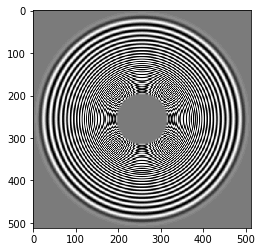

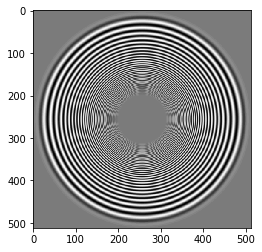

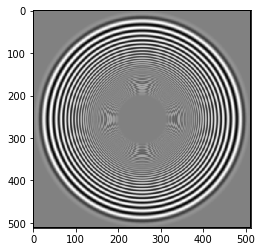

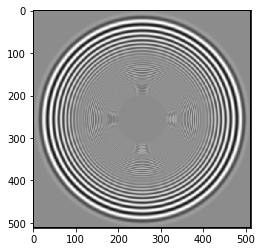

In [10]:
plt.imshow(fm, cmap="gray")
plt.show()
blur3 = local_average_good(fm,3)
blur5 = local_average_good(fm,5)
blur7 = local_average_good(fm,7)
plt.imshow(blur3, cmap="gray")
plt.show()
plt.imshow(blur5, cmap="gray")
plt.show()
plt.imshow(blur7, cmap="gray")
plt.show()

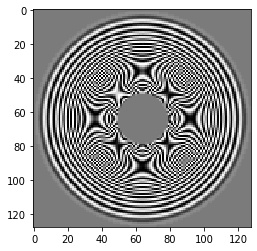

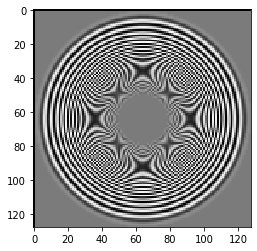

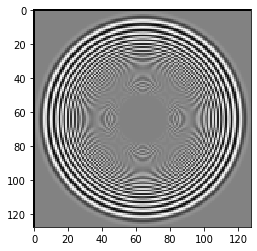

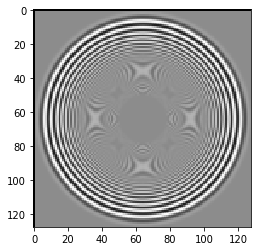

In [12]:
blur3sub = subsamp(blur3,4)
blur5sub = subsamp(blur5,4)
blur7sub = subsamp(blur7,4)
plt.imshow(fm_subx4,cmap="gray")
plt.show()
plt.imshow(blur3sub, cmap="gray")
plt.show()
plt.imshow(blur5sub, cmap="gray")
plt.show()
plt.imshow(blur7sub, cmap="gray")
plt.show()

## Quantisation by bit-shift operations

We can quantise the image range (for images this is usually 0..255) and visualise what happens if we quantise 
    the range to fewer levels, e.g. (128=7 bits, 64=6 bits, 32=5 bits, 16=4 bits, etc.).
    

In `numpy`, bytes can be represented by variable of data type `uint8` (unsigned integer, 8 bits), e.g.
~~~~
    a = np.uint8(10) # byte with value 10
~~~~

We can then left-shift or right-shift this value which multiples or divides by a factor of 2, e.g.
~~~~
    print(a<<1) # should print 20
    
    print(a>>1) # should print 5
~~~~

In Python we can print out the binary representation like this

~~~~
    print("{0:b}".format(a))
~~~~
To quantise a number to say 4 bits, we therefore need to right-shift by 4, e.g. 

~~~~
    a = np.uint8(57) # binary is [00111001]
    
    print("a is {0:b}".format(b)) 
    print("a right-shift 4 is {0:b}".format(a>>4)) 
~~~~

We can then re-express the number in 8-bits by left-shifting the quantised value.
~~~~
        print("a quanited (in 0-255) range is {0:b}".format((a>>4)<<4))) 
        
~~~~
Therefore with an image of type `uint8`, we can quantise it by right-shifting all the pixel values and then left-shifting them.


In [13]:

a = np.uint8(57) # make it 8 bits

print("a is {0:b}".format(a)) 

print("a right-shift 4 is {0:b}".format(a>>4)) # right-shift (quantise)
print("a right-shift then left-shift 4 is {0:b}".format((a>>4)<<4)) # left-shift to see what it does

# print out the decimal values
print("a in 8 bits is ", a, ', quantised it becomes ', ((a>>4)<<4))

a is 111001
a right-shift 4 is 11
a right-shift then left-shift 4 is 110000
a in 8 bits is  57 , quantised it becomes  48


## Exercise 5 -- Image quantisation

1. Using the bit shifting method, write a function to quantize an input image to an arbirary number of bits between 1 and 8.

~~~~
    def quantise_image(im, bits=8):
    
        quantised = ...   # quantise to bits number of bits
        
        output = ... # remap to range 0..255 by reversing quantisation
        
        return output
~~~~

2. Show the effect of quantisation on the `peppers.jpg` image.

3. Make a scalar image of the quantisation errors or 4-bit quantisation. 
    1. Where are the quantisation errors in the image?
    2. Where are the quantisation errors most visible?


In [14]:
def quantise_image(im, bits):
        im_cp = im.copy()
        for x in range(im.shape[0]):
            for y in range(im.shape[1]):
                for z in range(im.shape[2]):
                    quantised = (np.uint8(im[x][y][z])>>bits)<<bits
                    im_cp[x][y][z] = quantised
        return im_cp

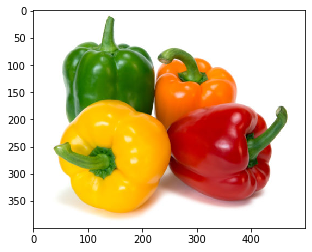

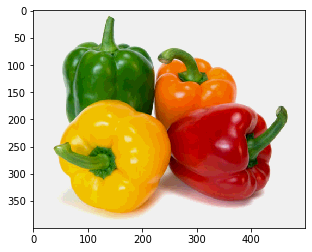

In [15]:
pep = np.asarray(Image.open(data_dir + 'peppers.jpg'))
plt.imshow(pep)
plt.show()
plt.imshow(quantise_image(pep,4))
plt.show()

## Colour conversion and Colour channel data compression

We can convert image pixels from a RGB colour space to a luminance-chromanance colour space, 
    e.g. YCbCr using utility functions defined.
    
Here are two functions which do this operation.

~~~~
    def rgb2ycbcr(im):
        xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
        
        ycbcr = im.dot(xform.T)
        ycbcr[:,:,[1,2]] += 128
        
        return np.uint8(ycbcr)

    def ycbcr2rgb(im):
        xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
        
        rgb = im.astype(np.float)
        
        rgb[:,:,[1,2]] -= 128
        rgb = rgb.dot(xform.T)
        
        np.putmask(rgb, rgb > 255, 255)
        np.putmask(rgb, rgb < 0, 0)
        
        return np.uint8(rgb)
~~~~

Can you work out what they are doing?

## Exercise 6 -- Colour conversion and colour channel 'compression'

1. Define the two methods and use them to display the Y, Cb and Cr channels of the `peppers.jpg` image as gray-scale images.

2. Use the `local_average` method to blur the Cb and Cr channels (either or both) and then convert them 
    back to a RGB image. Compare the the original image and the blurred Cb/Cr channel images. 
    
3. Repeat the previous exercise but this time subsample and upsample the Cb/Cr images instead of blurring them.

4. How much blurring/subsampling/upsampling can you do before you it starts to affect the reconstituted RGB image?

5. By reducing the sizes of the Cb/Cr images by subsampling, we are in effect compressing the data. 
   
   What is the compression factor if you subsample by some power-of-two factor $ F = 2^M $, where $ M = 1, 2, 3, ... $?

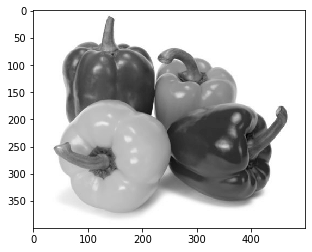

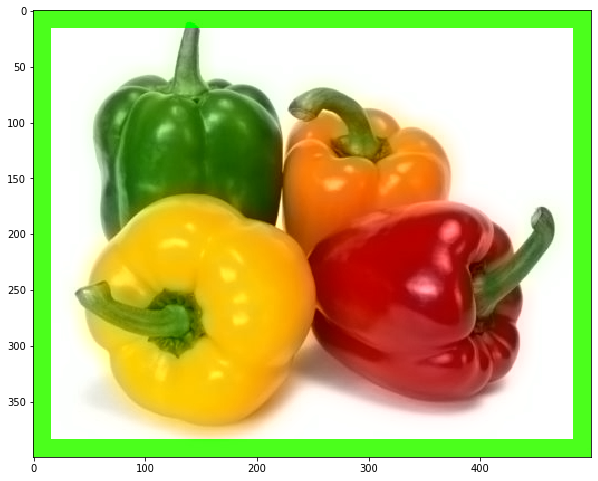

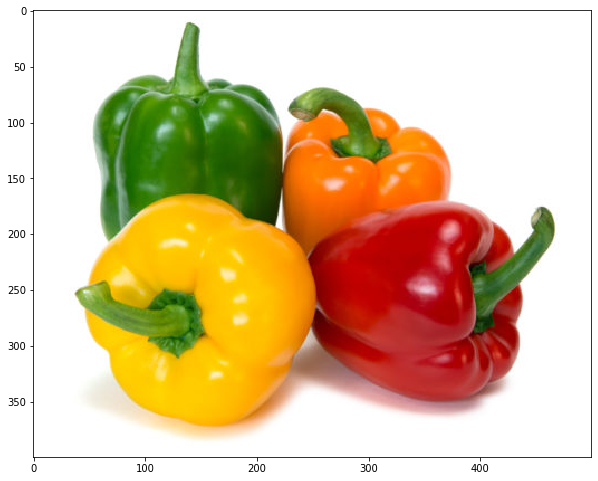

In [26]:
def rgb2ycbcr(im): #rgb to ycbcr
        xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])

        ycbcr = im.dot(xform.T)
        ycbcr[:,:,[1,2]] += 128

        return np.uint8(ycbcr)

def ycbcr2rgb(im): #ycbcr to rgb
        xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])

        rgb = im.astype(np.float)

        rgb[:,:,[1,2]] -= 128
        rgb = rgb.dot(xform.T)

        np.putmask(rgb, rgb > 255, 255)
        np.putmask(rgb, rgb < 0, 0)

        return np.uint8(rgb)
    
ypep = rgb2ycbcr(pep)
plt.imshow(ypep[:,:,0], cmap="gray")
plt.show()

blurcb = local_average(ypep[:,:,1],33)
blurcr = local_average(ypep[:,:,2],33)
ypepblur = ypep.copy()
ypepblur[:,:,1] = blurcb
ypepblur[:,:,2] = blurcr

fig = plt.figure(figsize=(10,10))
pepblur = ycbcr2rgb(ypepblur)
plt.imshow(pepblur)
plt.show()
fig = plt.figure(figsize=(10,10))
plt.imshow(pep)
plt.show()

In [ ]:
fact = 16
udcb = subsamp(upsample(ypep[:,:,1],fact),fact)
udcr = subsamp(upsample(ypep[:,:,2],fact),fact)
ypepud = ypep.copy()
ypepud[:,:,1] = udcb
ypepud[:,:,2] = udcr

fig = plt.figure(figsize=(10,10))
pepud = ycbcr2rgb(ypepud)
plt.imshow(pepud)
plt.show()
fig = plt.figure(figsize=(10,10))
plt.imshow(pep)
plt.show()

8000
6400
8000
6400
